In [3]:
data = read.csv('data/gtex_filtered2.csv', head=TRUE)
library('IHW')

In [94]:
data$group = groups_by_filter(data$x_value1, nbins = 20)

In [83]:
n_group = length(table(data$group))

In [114]:
threshold = numeric(n_group + 1)
for (i in seq(1, n_group-1, 1)) {
    low = max(data$x_value1[data$group == i])
    high = min(data$x_value1[data$group == i+1])
    threshold[i+1] = (low + high) / 2
}
threshold[1] = min(data$x_value1[data$group == 1]) - 1
threshold[n_group + 1] = max(data$x_value1[data$group == n_group]) + 1


In [116]:
threshold

[1]  1.397895 10.269102 10.967931 11.372784 11.689958 11.947564 12.158087
 [8] 12.347268 12.530577 12.684311 12.809894 12.920442 13.009602 13.081250
[15] 13.157483 13.244941 13.358955 13.489548 13.661414 13.860344 18.692917

In [82]:
min(data$x_value1[data$group == 4])

[1] 11.37281

In [122]:
m_groups = as.table(setNames(c(308236.0,311322.0,308234.0,344335.0,375867.0,382472.0,420402.0,489255.0,487448.0,458249.0,450156.0,402382.0,340424.0,385427.0,442816.0,604773.0,752360.0,1073832.0,1161809.0,1124055.0), 1:20))

In [133]:
ihwRes <- ihw(data$p_value , as.factor(data$group), alpha = 0.1, m_groups = m_groups, nfolds=5L)

In [134]:
rejections(ihwRes)

[1] 35771

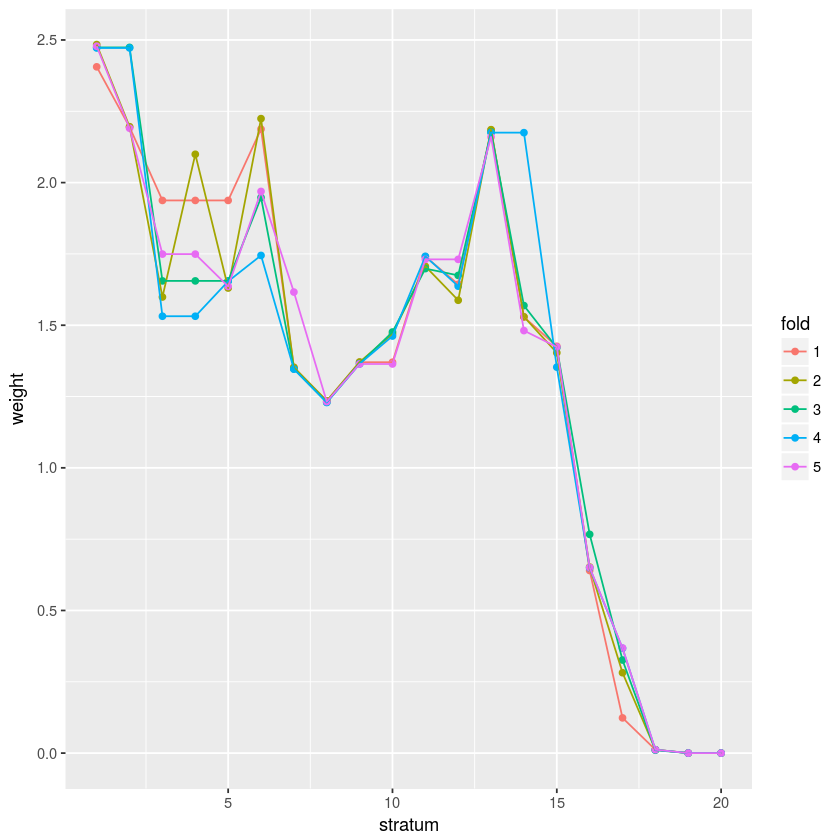

In [135]:
plot(ihwRes)

In [129]:
m_groups

      1       2       3       4       5       6       7       8       9      10 
 308236  311322  308234  344335  375867  382472  420402  489255  487448  458249 
     11      12      13      14      15      16      17      18      19      20 
 450156  402382  340424  385427  442816  604773  752360 1073832 1161809 1124055 